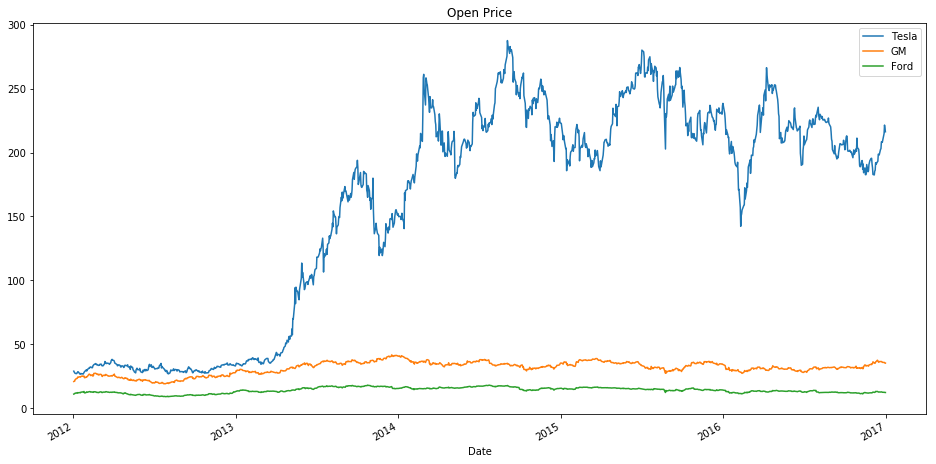

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1. GETTING THE DATA
# Using pandas_datareader to obtain the historical stock information for Tesla from Jan 1, 2012 to Jan 1, 2017

import pandas_datareader
import datetime
import pandas_datareader.data as web
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2017, 1, 1)
tesla = web.DataReader("TSLA", 'yahoo', start, end)
tesla.to_csv('Tesla_Stock.csv')

# Obtaining historical stock info for Ford and GM

ford = web.DataReader("F", 'yahoo', start, end)
gm = web.DataReader("GM",'yahoo',start,end)
ford.to_csv('Ford_Stock.csv')
gm.to_csv('GM_Stock.csv')

# 2. VISUALIZING THE DATA

tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Open Price')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend()


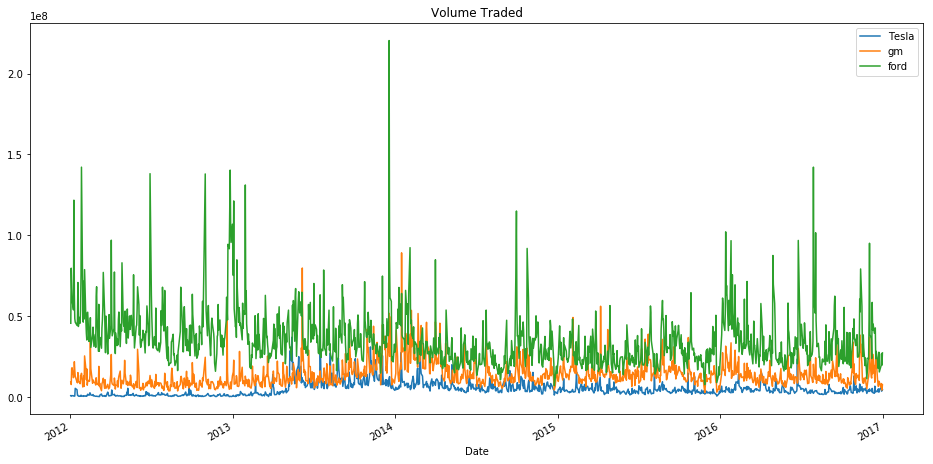

In [3]:
# Plot of the Volume of stock traded each day
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
gm['Volume'].plot(label='gm')
ford['Volume'].plot(label='ford')
plt.legend()

Text(0, 0.5, 'Total Traded')

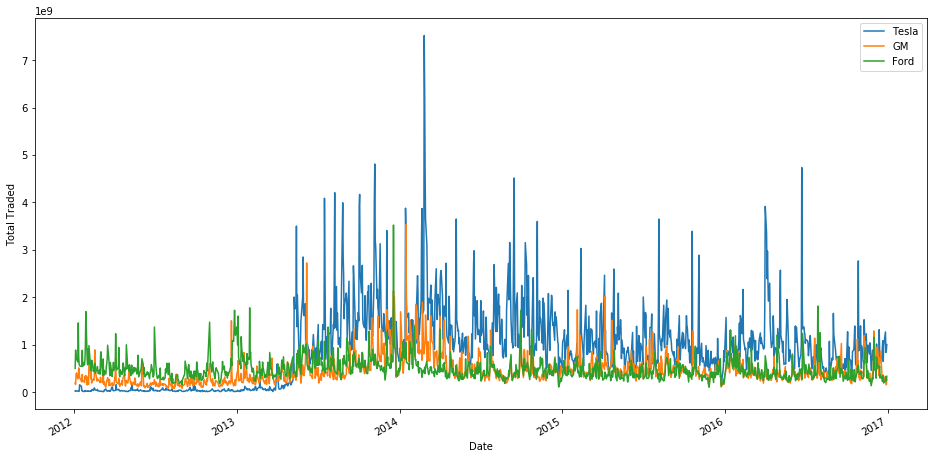

In [5]:
# Creating a new column call "Total Traded" which is the Open Price multiplied by the Volume Traded
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']
# Plot of "Total Traded" against the time index
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend()
plt.ylabel('Total Traded')

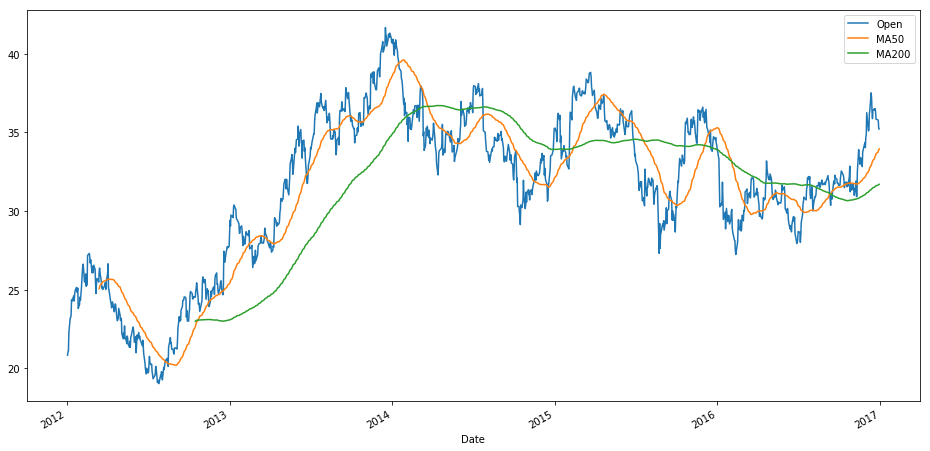

In [6]:
# Plot of MA (Moving Averages). Plot of the MA50 and MA200 for GM.
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(label='gm',figsize=(16,8))

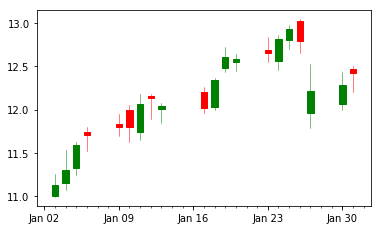

In [10]:
# Creating a CandleStick chart for Ford in January 2012
import mpl_finance
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

ford_reset = ford.loc['2012-01':'2012-01'].reset_index()

ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))
ford_values = [tuple(vals) for vals in ford_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, ford_values, width=0.6, colorup='g',colordown='r');

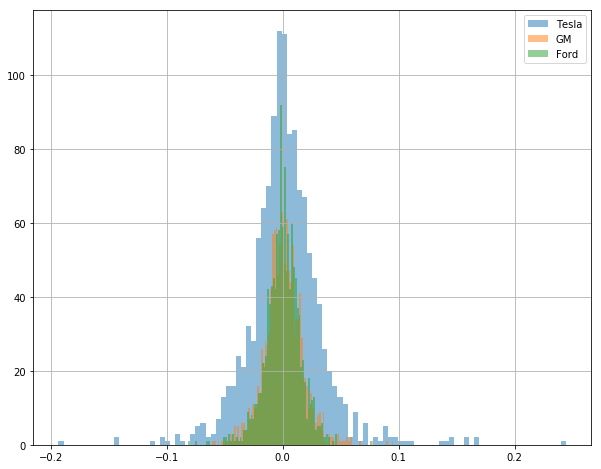

In [13]:
# 3. Basic Financial Analysis

# Creating a new column for each dataframe called returns. 
# This column will be calculated from the Close price column.
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) ) - 1
tesla['returns'] = tesla['Close'].pct_change(1)

ford['returns'] = (ford['Close'] / ford['Close'].shift(1) ) - 1
ford['returns'] = ford['Close'].pct_change(1)

gm['returns'] = (gm['Close'] / gm['Close'].shift(1) ) - 1
gm['returns'] = gm['Close'].pct_change(1)

# A stacked histogram of each company return
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=100,label='GM',alpha=0.5)
ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()


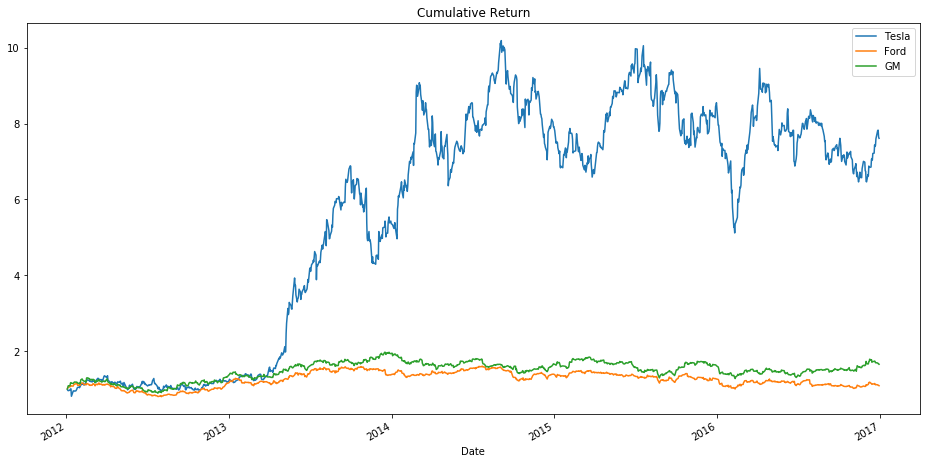

In [14]:
# Cumulative Daily Returns 
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()